# Implementasi Algoritma Bresenham

## 1. Preparing

Kita mengimpor `matplotlib.pyplot` untuk visualisasi grafiknya.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## 2. Input Titik

Meminta input dari pengguna untuk menentukan koordinat Titik A $(x_a, y_a)$ dan Titik B $(x_b, y_b)$. Algoritma Bresenham secara fundamental bekerja dengan koordinat integer (piksel).

In [2]:
# Algoritma Bresenham dirancang untuk integer (grid piksel)
x_a = int(input("Masukkan koordinat x untuk Titik A: "))
y_a = int(input("Masukkan koordinat y untuk Titik A: "))
x_b = int(input("Masukkan koordinat x untuk Titik B: "))
y_b = int(input("Masukkan koordinat y untuk Titik B: "))

## 3. Algoritma Bresenham

Bagian ini berisi logika inti dari algoritma Bresenham.

1.  Menyalin titik awal $(x_1, y_1)$ dan akhir $(x_2, y_2)$.
2.  Menghitung $dx$ (selisih $x$) dan $dy$ (selisih $y$) secara absolut.
3.  Menentukan arah langkah `sx` (1 atau -1) dan `sy` (1 atau -1).
4.  Menginisialisasi parameter error (keputusan), `err = dx - dy`.
5.  Melakukan iterasi:* Simpan titik $(x_1, y_1)$ saat ini.
    * Hentikan jika $(x_1, y_1)$ sudah sama dengan $(x_2, y_2)$.
    * Hitung error berikutnya (`e2 = 2 * err`).
    * Jika `e2 > -dy`, artinya error lebih condong ke arah $x$, maka $err$ dikurangi $dy$ dan $x_1$ melangkah sejauh `sx`.
    * Jika `e2 < dx`, artinya error lebih condong ke arah $y$, maka $err$ ditambah $dx$ dan $y_1$ melangkah sejauh `sy`.
6.  Menampilkan semua koordinat yang dihitung.

In [3]:
# Salin titik agar tidak mengubah nilai input asli
x1, y1 = x_a, y_a
x2, y2 = x_b, y_b

# List untuk menyimpan koordinat yang dihitung
x_coords = []
y_coords = []

# Hitung perbedaan absolut (delta)
dx = abs(x2 - x1)
dy = abs(y2 - y1)

# Tentukan arah langkah (sign) untuk x dan y
sx = 1 if x1 < x2 else -1
sy = 1 if y1 < y2 else -1

# Inisialisasi parameter error (keputusan)
err = dx - dy

while True:
    # Tambahkan (plot) titik saat ini
    x_coords.append(x1)
    y_coords.append(y1)

    # Hentikan loop jika sudah sampai di titik akhir
    if x1 == x2 and y1 == y2:
        break
    
    # e2 adalah error "look-ahead" untuk keputusan
    e2 = 2 * err

    # Cek apakah perlu melangkah di sumbu x
    if e2 > -dy:
        err -= dy
        x1 += sx

    # Cek apakah perlu melangkah di sumbu y
    if e2 < dx:
        err += dx
        y1 += sy

# Tampilkan hasil koordinat
print("Koordinat titik-titik yang dihitung (Bresenham):")
for i in range(len(x_coords)):
    print(f"({x_coords[i]}, {y_coords[i]})")

Koordinat titik-titik yang dihitung (Bresenham):
(10, 10)
(11, 11)
(12, 12)
(13, 13)
(14, 13)
(15, 14)
(16, 15)
(17, 16)


## 4. Gambar Garis & 5. Tampilkan Grafik

Menggunakan koordinat integer yang telah dihitung untuk menggambar piksel-piksel yang dipilih oleh algoritma. Kita akan menggunakan `scatter` dengan penanda kotak `marker='s'` untuk merepresentasikan piksel dengan lebih baik.

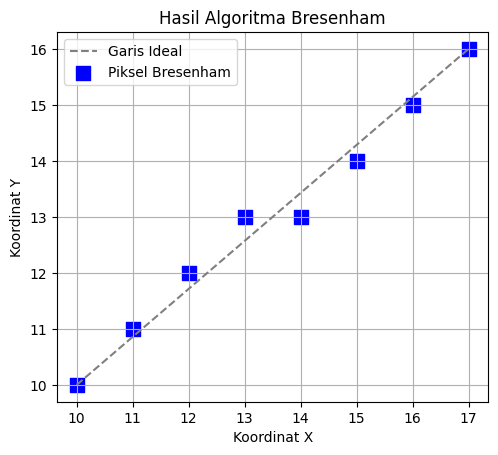

In [4]:
fig, ax = plt.subplots()

# Gambar garis ideal sebagai referensi (tipis, abu-abu)
ax.plot([x_a, x_b], [y_a, y_b], linestyle='--', color='gray', label='Garis Ideal')

# Gambar piksel yang dihitung oleh Bresenham
ax.scatter(x_coords, y_coords, marker='s', color='blue', label='Piksel Bresenham', s=100)

ax.set_title("Hasil Algoritma Bresenham")
ax.set_xlabel("Koordinat X")
ax.set_ylabel("Koordinat Y")
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
ax.legend()

# Paksa sumbu untuk menampilkan integer, karena ini grid piksel
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

## 6. Finish Task

Program telah selesai dieksekusi dan grafik piksel telah ditampilkan.